## Accessing data  Btc ,Eth

In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-01-08 13:20:48--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-08 13:20:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-08 13:20:49--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [6]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam,SGD
from torch.utils.data import TensorDataset,DataLoader

In [133]:
btc=pd.read_excel('/content/btc_prices.xlsx')
btc1=pd.read_excel('/content/btc_prices1.xlsx')

In [134]:
btc

,Time,"BTC / Transactions, transfers, value, median, USD","BTC / Transactions, count","BTC / Fees, total, USD","BTC / Fees, transaction, median, USD","BTC / Addresses, active, count","BTC / Difficulty, mean","BTC / Block, count","BTC / Block, size, mean, bytes","BTC / Supply, current","BTC / Transactions, transfers, count","BTC / Transactions, transfers, value, adjusted, USD"
0,2011-01-01,1.834500,473,2.674577e-02,0.000000,1071,1.448416e+04,181,1.103265e+03,5029650.00,842,6.125973e+03
1,2011-01-02,1.319868,418,2.630057e-02,0.000000,1097,1.448416e+04,175,1.065291e+03,5038400.00,716,9.194506e+03
2,2011-01-03,0.014750,997,2.148349e-01,0.000000,1405,1.596848e+04,156,2.527962e+03,5046200.00,1456,9.144782e+03
3,2011-01-04,0.035874,842,1.126363e-02,0.000000,1111,1.630742e+04,141,1.777610e+03,5053250.00,1289,4.521481e+03
4,2011-01-05,0.038859,1161,2.585319e-02,0.000000,1497,1.630742e+04,154,2.459513e+03,5060950.00,1711,7.700550e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,2023-12-19,14.516158,662370,1.800180e+07,15.661091,817240,6.730590e+13,162,1.695853e+06,19574911.78,1303964,6.586326e+09
4736,2023-12-20,16.940603,580281,1.868228e+07,17.203978,787679,6.730590e+13,145,1.658518e+06,19575818.03,1196080,8.206966e+09
4737,2023-12-21,17.620042,589222,1.780557e+07,16.825991,815395,6.730590e+13,146,1.708325e+06,19576730.53,1212578,6.074231e+09
4738,2023-12-22,17.513361,623750,1.395329e+07,12.976202,1012121,6.730590e+13,168,1.700745e+06,19577780.53,1294093,7.064821e+09


In [135]:
btc['Time']

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
4735   2023-12-19
4736   2023-12-20
4737   2023-12-21
4738   2023-12-22
4739   2023-12-23
Name: Time, Length: 4740, dtype: datetime64[ns]

In [136]:
btc['Open']=btc1['Open']
btc['High']=btc1['High']
btc['Low']=btc1['Low']
btc['Close']=btc1['Close']
btc['Volume']=btc1["Vol."]
btc['Change']=btc1['Change %']


In [137]:
btc["RRt"]=2*((btc['High']-btc['Low'])/(btc['High']+btc['Low']))
btc['Parkinson Volatility']=np.sqrt(((np.log((btc['High']/btc['Low']))**2)/(4*np.log(2))))

In [138]:
#Relative Strength Index (RSI):
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

#Exponential Moving Avgerage
def calculate_ema(data, column_name, window):
    alpha = 2 / (window + 1)
    data['EMA_' + str(window)] = data[column_name].ewm(span=window, adjust=False).mean()

#Moving Average Convergence Divergence (MACD)
def calculate_macd(data):
    # Calculate MACD using the closing prices
    macd, signal, _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    return  macd, signal


#Bollinger Bands
def calculate_bollinger_bands(data):
    # Calculate Bollinger Bands using the closing prices
    upper_band, _, lower_band = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
    return upper_band,lower_band
#Average True Range (ATR)
def calculate_atr(data):
    # Calculate ATR using the high, low, and close prices
    atr = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)
    return atr

#Stochastic Oscillator
def calculate_stochastic_oscillator(data, period_k, period_d):
    # Calculate %K
    Lowest_Low= data['Low'].rolling(window=period_k).min()
    Highest_High = data['High'].rolling(window=period_k).max()
    K = ((data['Close'] - Lowest_Low) / (Highest_High - Lowest_Low)) * 100

    # Calculate %D (3-period simple moving average of %K)
    D = K.rolling(window=period_d).mean()
    return K,D

#Williams %R
def calculate_williams_percent_r(data, period):
    # Calculate Highest High and Lowest Low over the specified period
    Highest_High = data['High'].rolling(window=period).max()
    Lowest_Low = data['Low'].rolling(window=period).min()

    # Calculate Williams %R
    R = -100 * (Highest_High - data['Close']) / (Highest_High-Lowest_Low)
    return R


#Aroon Oscillator
def calculate_Aroon_Oscillator(data,period):
    Aroon_Up = data['High'].rolling(window=period).apply(lambda x: x.argmax() / float(period) * 100, raw=True)
    Aroon_Down= data['Low'].rolling(window=period).apply(lambda x: x.argmin() / float(period) * 100, raw=True)

    # Calculate Aroon Oscillator
    Aroon_Oscillator = Aroon_Up - Aroon_Down
    return  Aroon_Oscillator

In [139]:
btc['SMA_20'] = btc['Close'].rolling(window=20).mean()
btc['RSI']=calculate_rsi(btc)
calculate_ema(btc, 'Close', window=20)
btc['MACD'],btc['Signal']=calculate_macd(btc)
btc["upper_bond"],btc['lower_bond']=calculate_bollinger_bands(btc)
btc['ATR']=calculate_atr(btc)
btc['%K'],btc['%D']=calculate_stochastic_oscillator(btc,period_k=14, period_d=3)
btc['%R']=calculate_williams_percent_r(btc,period=14)
btc[' Aroon_Oscillator']=calculate_Aroon_Oscillator(btc,period=14)




In [140]:
btc['day'] = btc['Time'].dt.day_name()

In [141]:
btc.fillna(0)


,Time,"BTC / Transactions, transfers, value, median, USD","BTC / Transactions, count","BTC / Fees, total, USD","BTC / Fees, transaction, median, USD","BTC / Addresses, active, count","BTC / Difficulty, mean","BTC / Block, count","BTC / Block, size, mean, bytes","BTC / Supply, current",...,MACD,Signal,upper_bond,lower_bond,ATR,%K,%D,%R,Aroon_Oscillator,day
0,2011-01-01,1.834500,473,2.674577e-02,0.000000,1071,1.448416e+04,181,1.103265e+03,5029650.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Saturday
1,2011-01-02,1.319868,418,2.630057e-02,0.000000,1097,1.448416e+04,175,1.065291e+03,5038400.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sunday
2,2011-01-03,0.014750,997,2.148349e-01,0.000000,1405,1.596848e+04,156,2.527962e+03,5046200.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Monday
3,2011-01-04,0.035874,842,1.126363e-02,0.000000,1111,1.630742e+04,141,1.777610e+03,5053250.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tuesday
4,2011-01-05,0.038859,1161,2.585319e-02,0.000000,1497,1.630742e+04,154,2.459513e+03,5060950.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,2023-12-19,14.516158,662370,1.800180e+07,15.661091,817240,6.730590e+13,162,1.695853e+06,19574911.78,...,1153.546858,1445.361651,45555.238556,38423.411444,1484.817835,44.841081,42.782215,-55.158919,-21.428571,Tuesday
4736,2023-12-20,16.940603,580281,1.868228e+07,17.203978,787679,6.730590e+13,145,1.658518e+06,19575818.03,...,1190.396799,1394.368681,45330.545997,39243.094003,1526.009418,76.590883,58.443615,-23.409117,-21.428571,Wednesday
4737,2023-12-21,17.620042,589222,1.780557e+07,16.825991,815395,6.730590e+13,146,1.708325e+06,19576730.53,...,1221.903769,1359.875698,45173.416499,39917.993501,1483.551603,81.185386,67.539117,-18.814614,-21.428571,Thursday
4738,2023-12-22,17.513361,623750,1.395329e+07,12.976202,1012121,6.730590e+13,168,1.700745e+06,19577780.53,...,1240.880412,1336.076641,45051.630839,40490.829161,1447.247917,89.661202,82.479157,-10.338798,78.571429,Friday


In [142]:
btc['Time'] = pd.to_datetime(btc['Time'])
cutoff_date_btc = pd.to_datetime('2015-11-20')
btc_ = btc[btc['Time'] >= cutoff_date_btc]
dates=btc_['Time']
dates=dates[2217:]
btc_=btc_.reset_index(drop=True)

In [143]:
dates

4001   2021-12-15
4002   2021-12-16
4003   2021-12-17
4004   2021-12-18
4005   2021-12-19
          ...    
4735   2023-12-19
4736   2023-12-20
4737   2023-12-21
4738   2023-12-22
4739   2023-12-23
Name: Time, Length: 739, dtype: datetime64[ns]

In [144]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
btc_['day']=btc_['day'].replace(day_mapping)
btc_=btc_.drop(columns=['Time'])


In [145]:
x=[]
for i in btc_['Volume']:
    if 'K' in i:
        z=i.split('K')
        x.append(float(z[0])*1000)
    elif 'M' in i:
        z=i.split('M')
        x.append(float(z[0])*1000000)
    elif 'B' in i:
        z=i.split('B')
        x.append(float(z[0])*1000000000)
    else:
        x.append(float(i))

btc_['Volume']=x

<Axes: >

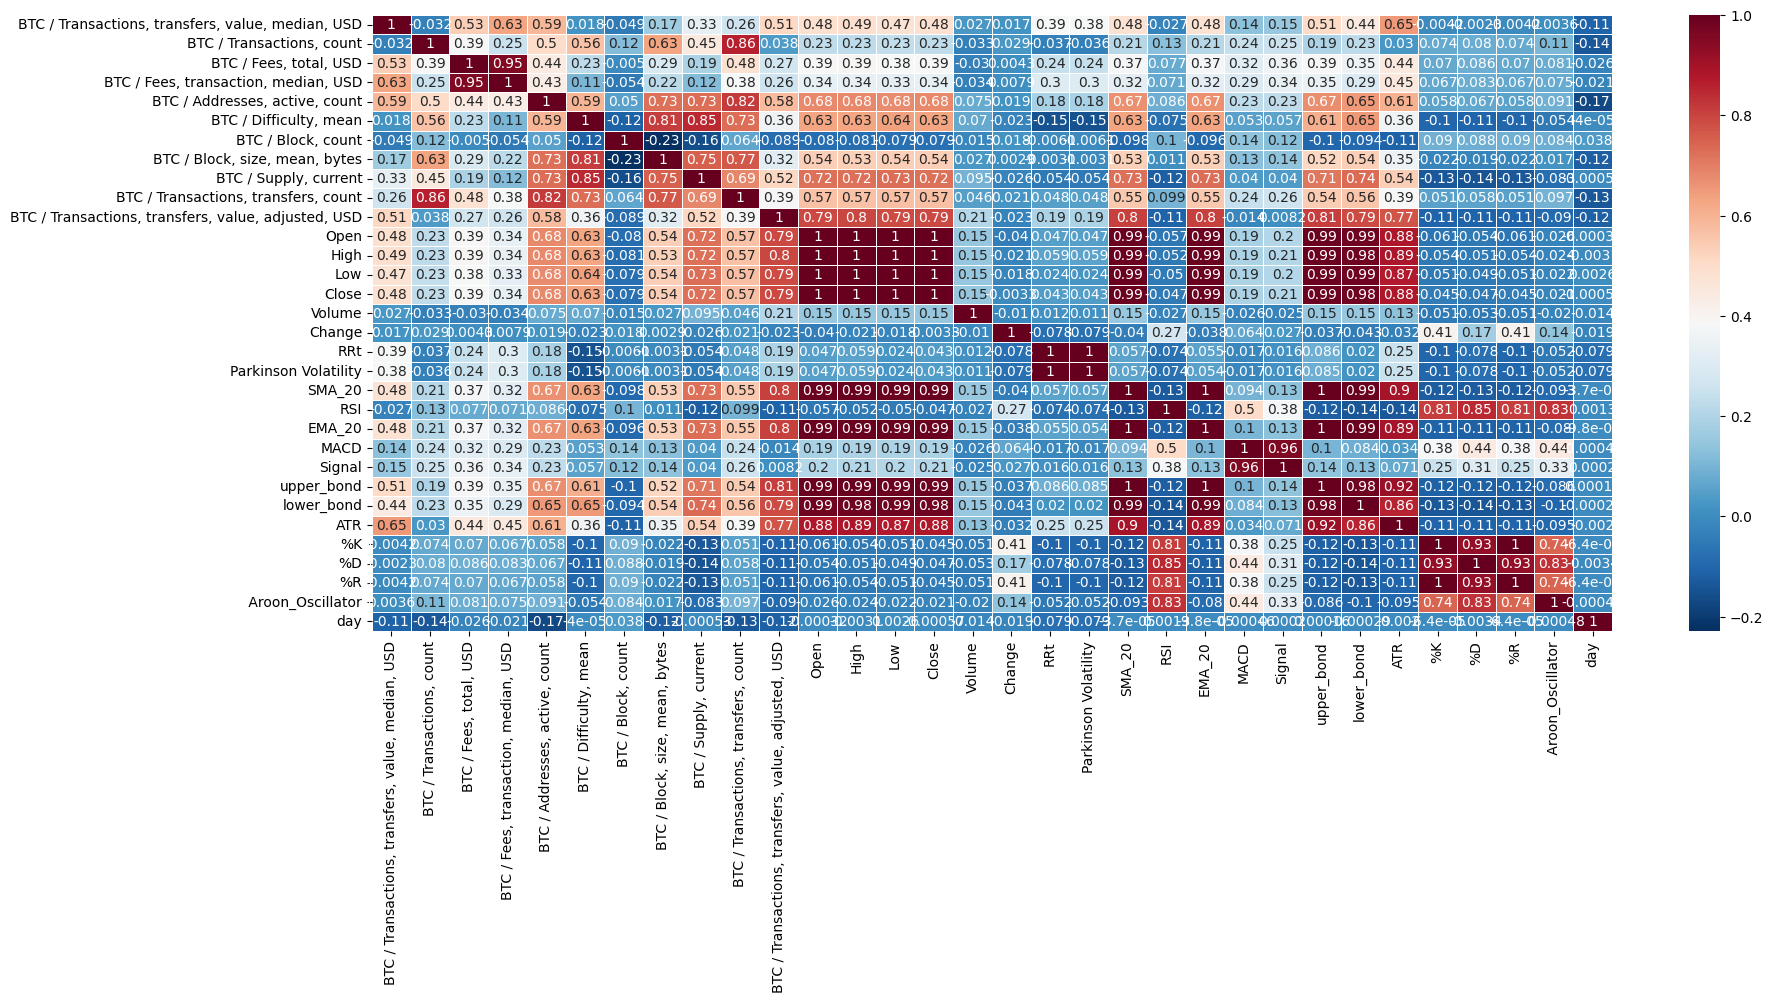

In [146]:
fig, ax = plt.subplots(figsize=(20, 8))
pearsoncorr = btc_.corr(method='pearson')
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [147]:
btc_=btc_.drop(columns=['BTC / Fees, transaction, median, USD','RRt','SMA_20','Signal','ATR','lower_bond','upper_bond','%D'])
btc_1=btc_.drop(columns=['High','Low','Open','Volume','Change'])

In [148]:
scaler = MinMaxScaler()

In [149]:
def sequence_define(data,split_len,seq_length,index_of_Y,scaler):
  split_point=int(split_len*data.shape[0])
  train=  scaler.fit_transform(data[:split_point])
  test=  scaler.fit_transform(data[int(split_point-seq_length):])  #tail of train data is need as the model requires the seq_length of data to predict
  X_train=[]
  Y_train=[]
  for i in range(seq_length,train.shape[0]):
      X_train.append(train[i-seq_length:i])
      Y_train.append(train[i,index_of_Y])


  X_test=[]
  Y_test=[]
  for i in range(seq_length,test.shape[0]):
      X_test.append(test[i-seq_length:i])
      Y_test.append(test[i,index_of_Y])
  return torch.tensor(np.array(X_train),dtype=torch.float32),torch.tensor(np.array(Y_train),dtype=torch.float32),torch.tensor(np.array(X_test),dtype=torch.float32),torch.tensor(np.array(Y_test),dtype=torch.float32)


In [150]:
X_train, Y_train,X_test, Y_test =sequence_define(btc_1,0.75,60,10,scaler)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape


(torch.Size([2157, 60, 19]),
 torch.Size([2157]),
 torch.Size([739, 60, 19]),
 torch.Size([739]))

In [151]:
batch_size = 50
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## LSTM Model

In [152]:
# Define the LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True, dropout=0.3)
        self.lstm3 = nn.LSTM(hidden_size2, hidden_size3, batch_first=True, dropout=0.4)
        self.lstm4 = nn.LSTM(hidden_size3, output_size, batch_first=True, dropout=0.5)
        self.linear = nn.Linear(output_size, 1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)
        out, _ = self.lstm4(out)
        out = self.linear(out[:, -1, :])
        return out

In [153]:
input_size = X_train.shape[2]
hidden_size1, hidden_size2, hidden_size3, output_size = 50, 60, 80, 120
model = LSTMModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout op

In [154]:
#Defining Training loop
def training(train_loader,epochs,model,criterion,model_name):
  best_loss=float('inf')
  total_loss=0
  epochs = epochs
  for epoch in range(epochs):
    for batch_X, batch_Y in train_loader:
      optimizer.zero_grad()
      outputs = model(batch_X)
      loss = criterion(outputs.squeeze(), batch_Y)
      loss.backward()
      optimizer.step()
      if loss<best_loss:
        torch.save(model.state_dict(),f"/content/{model_name}.pth")
        best_loss=loss

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

In [155]:
def testing(data,model,model_name):
  model.load_state_dict(torch.load(f'/content/{model_name}.pth'))
  model.eval()
# Make predictions
  with torch.no_grad():
    prediction = model(X_test)
  return prediction.numpy()

In [156]:
training(train_loader,20,model,criterion,"BTC_CLOSE")

Epoch [1/20], Loss: 0.0049
Epoch [2/20], Loss: 0.0010
Epoch [3/20], Loss: 0.0002
Epoch [4/20], Loss: 0.0002
Epoch [5/20], Loss: 0.0016
Epoch [6/20], Loss: 0.0008
Epoch [7/20], Loss: 0.0005
Epoch [8/20], Loss: 0.0024
Epoch [9/20], Loss: 0.0003
Epoch [10/20], Loss: 0.0002
Epoch [11/20], Loss: 0.0015
Epoch [12/20], Loss: 0.0001
Epoch [13/20], Loss: 0.0008
Epoch [14/20], Loss: 0.0004
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0002
Epoch [17/20], Loss: 0.0006
Epoch [18/20], Loss: 0.0001
Epoch [19/20], Loss: 0.0001
Epoch [20/20], Loss: 0.0001


In [157]:
prediction=testing(X_test,model,"BTC_CLOSE")

In [158]:
Y_test.shape

torch.Size([739])

In [159]:
def descaler(prediction,Y_test,scaler,index):
  x=1/(scaler.scale_[index])
  prediction=prediction*x
  Y_test=Y_test*x
  return prediction,Y_test


In [160]:
def plot_price(dates,prediction,actualvalue):
  plt.plot_date(dates,prediction,'-',label='Prediction')
  plt.plot_date(dates,actualvalue,'-',label='real')
  plt.xticks(rotation=45)
  plt.legend();

In [161]:
len(dates)

739

In [162]:
prediction.shape,Y_test.shape

((739, 1), torch.Size([739]))

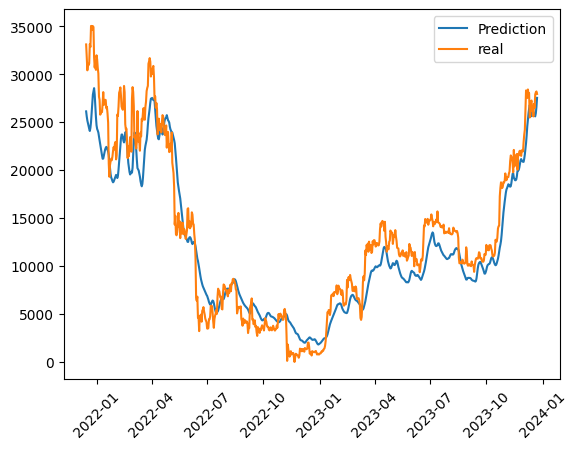

In [163]:
prediction,Y_test=descaler(prediction,Y_test,scaler,10)
plot_price(dates,prediction,Y_test)

###Ethereum

In [164]:
eth=pd.read_excel('/content/eth_prices.xlsx')
eth_1=pd.read_excel('/content/eth_prices1.xlsx')

In [165]:
eth

,Time,"ETH / Transactions, transfers, value, median, USD","ETH / Transactions, count","ETH / Fees, total, USD","ETH / Fees, transaction, median, USD","ETH / Addresses, active, count","ETH / Difficulty, mean","ETH / Block, count","ETH / Block, size, mean, bytes","ETH / Supply, current","ETH / Transactions, transfers, count","ETH / Transactions, transfers, value, adjusted, USD"
0,2015-07-30,NaN,0,NaN,NaN,9206,1.213355e+11,6911,643.886124,7.204930e+07,0,NaN
1,2015-07-31,NaN,0,NaN,NaN,424,6.029419e+11,6863,582.027976,7.208549e+07,0,NaN
2,2015-08-01,NaN,0,NaN,NaN,413,8.872542e+11,5293,575.164179,7.211320e+07,0,NaN
3,2015-08-02,NaN,0,NaN,NaN,432,1.020254e+12,5358,580.878686,7.214142e+07,0,NaN
4,2015-08-03,NaN,0,NaN,NaN,444,1.125837e+12,5280,587.112311,7.216940e+07,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2023-12-19,258.344673,1153138,1.382803e+07,5.265959,494273,0.000000e+00,7114,195440.528395,1.261332e+08,1018158,5.813156e+09
3065,2023-12-20,333.796427,1246531,1.399959e+07,5.097611,548566,0.000000e+00,7116,173457.693227,1.261526e+08,1084390,6.323398e+09
3066,2023-12-21,222.658511,1242003,1.089766e+07,3.924472,567354,0.000000e+00,7144,148209.526596,1.261564e+08,1045008,4.921113e+09
3067,2023-12-22,147.429353,1205712,9.406083e+06,3.221511,559865,0.000000e+00,7131,157152.837050,1.261758e+08,1006757,6.855421e+09


In [166]:
eth_1

,Date,Close,Open,High,Low,Vol.,Change %
0,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,0.0491
1,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,0.0170
2,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,0.0812
3,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,0.1664
4,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-0.1705
...,...,...,...,...,...,...,...
2841,"Dec 20, 2023",2202.19,2177.45,2263.30,2161.76,440.35K,0.0114
2842,"Dec 21, 2023",2239.62,2202.19,2277.72,2183.35,471.46K,0.0170
2843,"Dec 22, 2023",2324.23,2239.62,2341.52,2232.83,620.73K,0.0378
2844,"Dec 23, 2023",2308.61,2324.24,2330.07,2267.39,266.30K,-0.0067


In [167]:
eth['Time'] = pd.to_datetime(eth['Time'])
eth_1['Date'] = pd.to_datetime(eth_1['Date'])

In [168]:
# Assuming 'Time' and 'Date' are datetime columns


# Merge DataFrames based on the 'Time' and 'Date' columns
eth = pd.merge(eth, eth_1[['Date', 'Open','High','Close','Low','Vol.',	'Change %']], left_on='Time', right_on='Date', how='left')

eth.drop('Date', axis=1, inplace=True)

# Rename the 'Open' column from eth_1 to avoid conflicts
eth=eth.fillna(0)
eth

,Time,"ETH / Transactions, transfers, value, median, USD","ETH / Transactions, count","ETH / Fees, total, USD","ETH / Fees, transaction, median, USD","ETH / Addresses, active, count","ETH / Difficulty, mean","ETH / Block, count","ETH / Block, size, mean, bytes","ETH / Supply, current","ETH / Transactions, transfers, count","ETH / Transactions, transfers, value, adjusted, USD",Open,High,Close,Low,Vol.,Change %
0,2015-07-30,0.000000,0,0.000000e+00,0.000000,9206,1.213355e+11,6911,643.886124,7.204930e+07,0,0.000000e+00,0.00,0.00,0.00,0.00,0,0.0000
1,2015-07-31,0.000000,0,0.000000e+00,0.000000,424,6.029419e+11,6863,582.027976,7.208549e+07,0,0.000000e+00,0.00,0.00,0.00,0.00,0,0.0000
2,2015-08-01,0.000000,0,0.000000e+00,0.000000,413,8.872542e+11,5293,575.164179,7.211320e+07,0,0.000000e+00,0.00,0.00,0.00,0.00,0,0.0000
3,2015-08-02,0.000000,0,0.000000e+00,0.000000,432,1.020254e+12,5358,580.878686,7.214142e+07,0,0.000000e+00,0.00,0.00,0.00,0.00,0,0.0000
4,2015-08-03,0.000000,0,0.000000e+00,0.000000,444,1.125837e+12,5280,587.112311,7.216940e+07,0,0.000000e+00,0.00,0.00,0.00,0.00,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2023-12-19,258.344673,1153138,1.382803e+07,5.265959,494273,0.000000e+00,7114,195440.528395,1.261332e+08,1018158,5.813156e+09,2218.82,2254.75,2177.44,2137.80,400.94K,-0.0186
3065,2023-12-20,333.796427,1246531,1.399959e+07,5.097611,548566,0.000000e+00,7116,173457.693227,1.261526e+08,1084390,6.323398e+09,2177.45,2263.30,2202.19,2161.76,440.35K,0.0114
3066,2023-12-21,222.658511,1242003,1.089766e+07,3.924472,567354,0.000000e+00,7144,148209.526596,1.261564e+08,1045008,4.921113e+09,2202.19,2277.72,2239.62,2183.35,471.46K,0.0170
3067,2023-12-22,147.429353,1205712,9.406083e+06,3.221511,559865,0.000000e+00,7131,157152.837050,1.261758e+08,1006757,6.855421e+09,2239.62,2341.52,2324.23,2232.83,620.73K,0.0378


In [169]:
eth['SMA_20'] = eth['Close'].rolling(window=20).mean()
eth['RSI']=calculate_rsi(eth)
calculate_ema(eth, 'Close', window=150)
eth['MACD'],eth['Signal']=calculate_macd(eth)
eth["upper_bond"],eth['lower_bond']=calculate_bollinger_bands(eth)
eth['ATR']=calculate_atr(eth)
eth['%K'],eth['%D']=calculate_stochastic_oscillator(eth,period_k=14, period_d=3)
eth['%R']=calculate_williams_percent_r(eth,period=14)
eth[' Aroon_Oscillator']=calculate_Aroon_Oscillator(eth,period=14)
eth["RRt"]=2*((eth['High']-eth['Low'])/(eth['High']+eth['Low']))
eth['Parkinson Volatility']=np.sqrt(((np.log((eth['High']/eth['Low']))**2)/(4*np.log(2))))

In [170]:
eth['day'] = eth['Time'].dt.day_name()

In [182]:
eth['Time'] = pd.to_datetime(eth['Time'])
cutoff_date_eth = pd.to_datetime('2016-10-14')
eth_ = eth[eth['Time'] >= cutoff_date_eth]
dates=eth_['Time']
dates=dates[1970:]
eth_=eth_.reset_index(drop=True)

In [172]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
eth_['day']=eth_['day'].replace(day_mapping)
eth_=eth_.drop(columns=['Time'])


<ipython-input-173-78657717305c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsoncorr = eth.corr(method='pearson')


<Axes: >

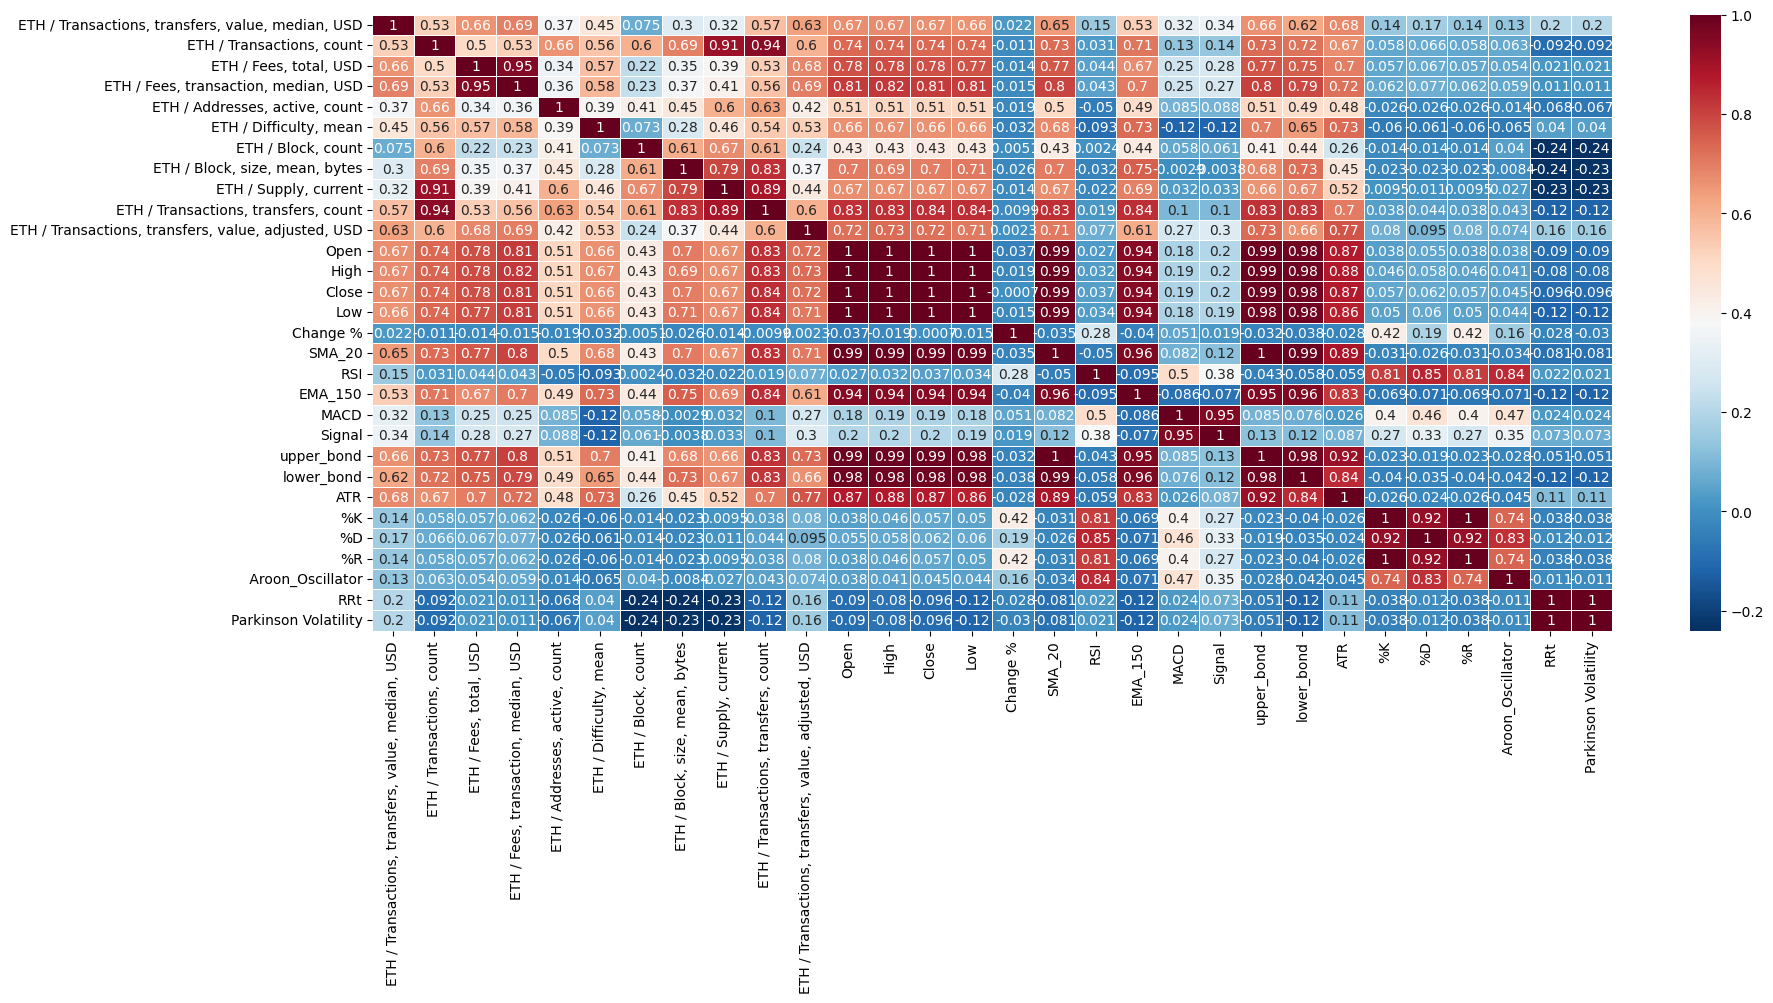

In [173]:
fig, ax = plt.subplots(figsize=(20, 8))
pearsoncorr = eth.corr(method='pearson')
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [174]:
eth_=eth_.drop(columns=["ETH / Supply, current",'ETH / Transactions, count','ETH / Fees, total, USD','SMA_20','upper_bond','lower_bond','MACD','%K',"%R",'RRt'])
eth_1=eth_.drop(columns=['High','Low','Open','Vol.','Change %'])

In [175]:
scaler_2 = MinMaxScaler()

In [176]:
X_train, Y_train,X_test, Y_test =sequence_define(eth_1,0.75,60,9,scaler_2)
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

(torch.Size([1910, 60, 17]),
 torch.Size([1910]),
 torch.Size([657, 60, 17]),
 torch.Size([657]))

In [177]:
batch_size = 50
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [178]:
input_size = X_train.shape[2]
hidden_size1, hidden_size2, hidden_size3, output_size = 50, 60, 80, 120
model_2 = LSTMModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = Adam(model_2.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout op

In [179]:
training(train_loader,20,model_2,criterion,"ETH_CLOSE")

Epoch [1/20], Loss: 0.0155
Epoch [2/20], Loss: 0.0137
Epoch [3/20], Loss: 0.0126
Epoch [4/20], Loss: 0.0163
Epoch [5/20], Loss: 0.0178
Epoch [6/20], Loss: 0.0060
Epoch [7/20], Loss: 0.0068
Epoch [8/20], Loss: 0.0064
Epoch [9/20], Loss: 0.0054
Epoch [10/20], Loss: 0.0130
Epoch [11/20], Loss: 0.0125
Epoch [12/20], Loss: 0.0040
Epoch [13/20], Loss: 0.0083
Epoch [14/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0055
Epoch [16/20], Loss: 0.0047
Epoch [17/20], Loss: 0.0045
Epoch [18/20], Loss: 0.0047
Epoch [19/20], Loss: 0.0064
Epoch [20/20], Loss: 0.0043


In [180]:
prediction=testing(X_test,model_2,"ETH_CLOSE")

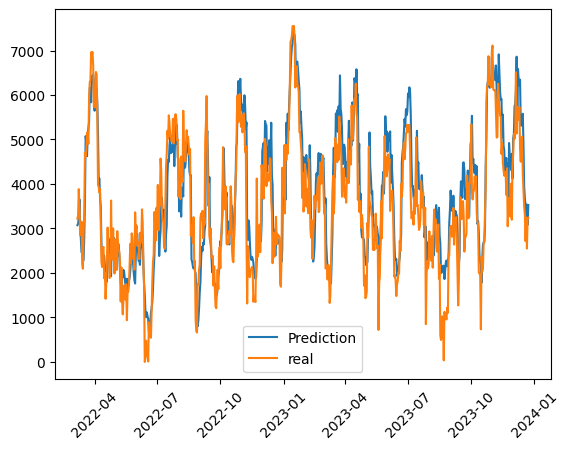

In [183]:
prediction,Y_test=descaler(prediction,Y_test,scaler_2,9)
plot_price(dates,prediction,Y_test)